In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras import Sequential

In [2]:
#connecting kaggle dataset to collab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
from keras.layers import BatchNormalization,Dropout

In [6]:
#Generating data from directory to our system
#converting  cats and  dogs as 0 and 1 from our train ds
#images in train ds are of different size hence converting images in standard format 256*256
train_ds = keras.utils.image_dataset_from_directory(directory ='/content/train',
                                                    labels='inferred', label_mode='int',
                                                    batch_size=32, image_size=(256, 256))

validation_ds = keras.utils.image_dataset_from_directory(directory ='/content/test',
                                                    labels='inferred', label_mode='int',
                                                    batch_size=32, image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalization
def process(image,label):
  image = tf.cast(image/255.0,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
train_ds
#shape 256*256*3 of float

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
#model building
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding = "valid",activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = "valid",strides =2))

model.add(Conv2D(64,kernel_size=(3,3),padding = "valid",activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = "valid",strides =2))

model.add(Conv2D(128,kernel_size=(3,3),padding = "valid",activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = "valid",strides =2))

model.add(Conv2D(256,kernel_size=(3,3),padding = "valid",activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = "valid",strides =2))

model.add(Flatten())

model.add(Dense(128,activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation = "sigmoid"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer = "adam",loss = keras.losses.binary_crossentropy,metrics = ["accuracy"])

In [12]:
history = model.fit(train_ds,validation_data=validation_ds,batch_size =32,epochs = 10)

Epoch 1/10
625/625 [==============================] - 82s 116ms/step - loss: 1.3351 - accuracy: 0.5369 - val_loss: 0.7265 - val_accuracy: 0.6028
Epoch 2/10
625/625 [==============================] - 70s 112ms/step - loss: 0.6611 - accuracy: 0.6082 - val_loss: 0.6133 - val_accuracy: 0.6488
Epoch 3/10
625/625 [==============================] - 71s 113ms/step - loss: 0.6046 - accuracy: 0.6638 - val_loss: 0.5653 - val_accuracy: 0.7114
Epoch 4/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5318 - accuracy: 0.7270 - val_loss: 0.5143 - val_accuracy: 0.7392
Epoch 5/10
625/625 [==============================] - 72s 114ms/step - loss: 0.4556 - accuracy: 0.7850 - val_loss: 0.5103 - val_accuracy: 0.7620
Epoch 6/10
625/625 [==============================] - 72s 114ms/step - loss: 0.3861 - accuracy: 0.8284 - val_loss: 0.4774 - val_accuracy: 0.7630
Epoch 7/10
625/625 [==============================] - 72s 114ms/step - loss: 0.3126 - accuracy: 0.8655 - val_loss: 0.3142 - val_ac

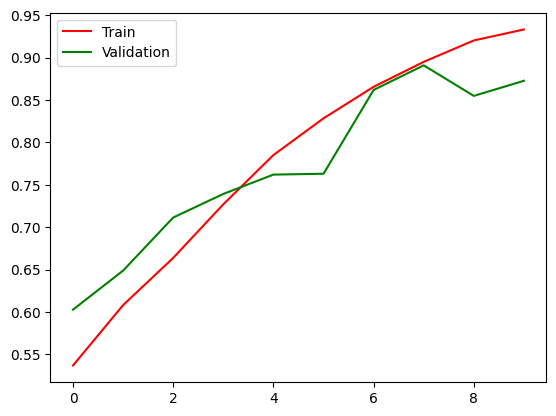

In [13]:
plt.plot(history.history["accuracy"],color = 'red',label = "Train")
plt.plot(history.history["val_accuracy"],color = 'green',label = "Validation")
plt.legend()
plt.show()

Conclusion : loss: 0.1634 - accuracy: 0.9331 - val_loss: 0.3068 - val_accuracy: 0.8726

In [15]:
import cv2

In [16]:
img = cv2.imread("/content/Dog1234.jpg")

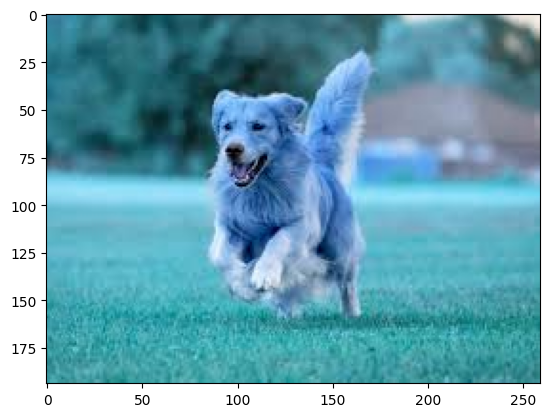

In [17]:
plt.imshow(img)

In [18]:
img.shape

(194, 259, 3)

In [19]:
#reshape them to 256,256,3
img = cv2.resize(img,(256,256))

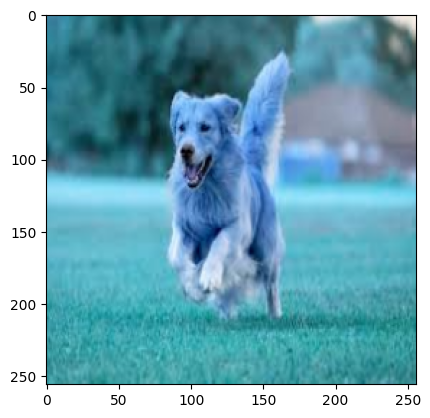

In [20]:
plt.imshow(img)

In [21]:
test_img = img.reshape((1,256,256,3))

In [22]:
model.predict(test_img)

1/1 [==============================] - 1s 747ms/step


array([[1.]], dtype=float32)

1->Dog

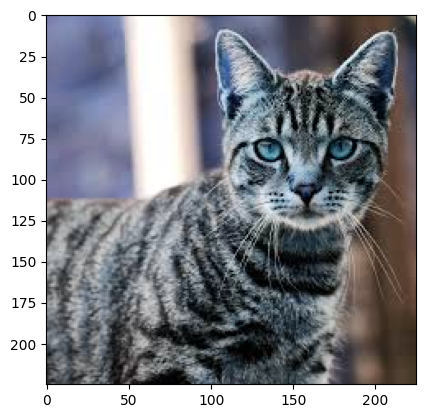

In [28]:
img = cv2.imread("/content/cat1234.jpg")
plt.imshow(img)

In [29]:
img.shape

(225, 225, 3)

In [30]:
img = cv2.resize(img,(256,256))
test_img = img.reshape((1,256,256,3))

In [31]:
model.predict(test_img)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

0-cat

In [ ]:
#https://www.kaggle.com/datasets/salader/dogs-vs-cats